In [1]:
from classes.dataManagement import DataManagement 
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import difflib
import math  
import pandas as pd

from sklearn.decomposition import PCA


dm = DataManagement()
import decimal

# 1. Dataset

In [2]:
x = np.array(dm.trainImages)
y = np.array(dm.trainLabels)

X = x / 255 #divise by 255 because each value is a white value (0 to 255)
y = y.reshape(len(y), 1)

X = np.hstack((X, np.ones((X.shape[0], 1))))
print(X.shape)
print(y.shape)

pca = PCA(.95)
pca.fit(X)
print(pca.n_components_)
X = pca.transform(X)

#theta
theta = np.random.rand(len(X[0]),1)
print(theta.shape)


(60000, 785)
(60000, 1)
154
(154, 1)


# Modèle

In [4]:
#Modèle
def model(X, theta):
    return X.dot(theta)

In [5]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((X.dot(theta) - y) ** 2)

In [6]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [7]:
def gradient_descent(X, y, theta, learningRate, nbIteration):
    cost_history = np.zeros(nbIteration)
    for i in range(0, nbIteration):
        theta = theta - learningRate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

# Coefficient de détermination

In [8]:
def coef_determination(pred, y):
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((pred-y)**2)
    r2 = 1-(ssr/sst)
    return(r2)

# Machine learning

R² score: -2.718521308454745


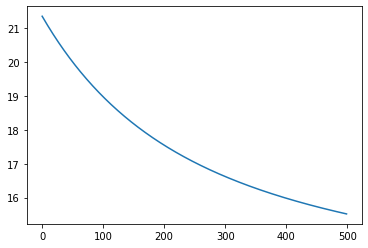

In [10]:
theta = np.random.rand(len(X[0]),1)
n = 500
learningRate = 0.001

thetaFinal, cost_history = gradient_descent(X, y, theta, learningRate = learningRate, nbIteration = n)
plt.plot(range(n), cost_history)

pred = model(X, thetaFinal)
print("R² score:", coef_determination(pred, y))

# Show results

In [90]:
tmp = []
tmp2 = []
tmp3 = []

for i in range(100):
    tmp.append(math.ceil(pred[i][0]))
    tmp2.append(y[i][0])
    success = "OK" if math.ceil(pred[i]) == y[i] else "X"
    tmp3.append(success)
    
d = {'prediction': tmp, 'label': tmp2, 'match?': tmp3}
df = pd.DataFrame(data=d)
pd.set_option('display.max_rows', df.shape[0]+1)
df

,prediction,label,match?
0,6,5,X
1,1,0,X
2,4,4,OK
3,3,1,X
4,8,9,X
5,4,2,X
6,2,1,X
7,4,3,X
8,2,1,X
9,6,4,X
